# Lab Customer Analysis (predicting claim amount) (final round)

**importing packages**

In [77]:
# pandas, numpy, matplotlib, %matplotlib inline, seaborn 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [78]:
#import the model

from sklearn import linear_model

#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score 

**Reading the data, review the shape** 

In [79]:
data=pd.read_csv('./clean_marketing.csv')

In [80]:
data.head(20)

,Unnamed: 0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_date_month
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
5,5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,...,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,1
6,6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,...,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,2
7,7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,...,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize,1
8,8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,...,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,1
9,9,BQ94931,Oregon,7388.178085,No,Extended,College,2011-02-17,Employed,F,...,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize,2


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     9134 non-null   int64  
 1   customer                       9134 non-null   object 
 2   state                          9134 non-null   object 
 3   customer_lifetime_value        9134 non-null   float64
 4   response                       9134 non-null   object 
 5   coverage                       9134 non-null   object 
 6   education                      9134 non-null   object 
 7   effective_to_date              9134 non-null   object 
 8   employmentstatus               9134 non-null   object 
 9   gender                         9134 non-null   object 
 10  income                         9134 non-null   int64  
 11  location_code                  9134 non-null   object 
 12  marital_status                 9134 non-null   o

In [82]:
data.shape

(9134, 26)

In [83]:
# Isolating numerical data
data_num=data.select_dtypes(include=np.number)

In [84]:
data_num.head(20)

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_month
0,0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,3,7645.861827,0,106,18,65,0,7,529.881344,1
4,4,2813.692575,43836,73,12,44,0,1,138.130879,2
5,5,8256.297800,62902,69,14,94,0,2,159.383042,1
6,6,5380.898636,55350,67,0,13,0,9,321.600000,2
7,7,7216.100311,0,101,0,68,0,4,363.029680,1
8,8,24127.504020,14072,71,13,3,0,2,511.200000,1
9,9,7388.178085,28812,93,17,7,0,8,425.527834,2


In [85]:
data_num.shape

(9134, 10)

**(applying the model before pre-processing)**

In [86]:
y=data_num['total_claim_amount']

In [87]:
X=data_num.drop(['total_claim_amount'],axis=1)

In [88]:
lm=linear_model.LinearRegression()

In [89]:
# fit the model to our data (only numerical data)
line=lm.fit(x,y)

# calculate a score - R2 score 
lm.score(x,y)

0.5188232701358604

In [90]:
predictions  = lm.predict(x)
predictions

array([242.3846191 , 559.48034308, 467.50841438, ..., 518.42714229,
       509.60521733, 478.77124695])

In [91]:
r2_score(y, predictions)

0.5188232701358604

In [92]:
mean_squared_error(y, predictions)

40602.204533140466

In [93]:
lm.intercept_

66.24243562706215

In [94]:
lm.coef_

array([ 1.39475926e-03, -6.85010581e-04, -3.29171571e-03,  5.34366918e+00,
       -1.45140438e-01, -1.01788808e-01, -1.36015566e+00,  2.69049676e-01,
       -2.77775665e-01])

**03.Splitting the data into numeric and categorical features**

In [95]:
y=data['total_claim_amount'] # defining the y predictor variable

In [96]:
data=data.drop(['total_claim_amount'],axis=1) # dropping y from x

In [97]:
x_num=data.select_dtypes(include = np.number)

In [98]:
x_cat=data.select_dtypes(include = object)

**04.Pre-processing data**

**Outliers. Normalization. (in numeric data)**

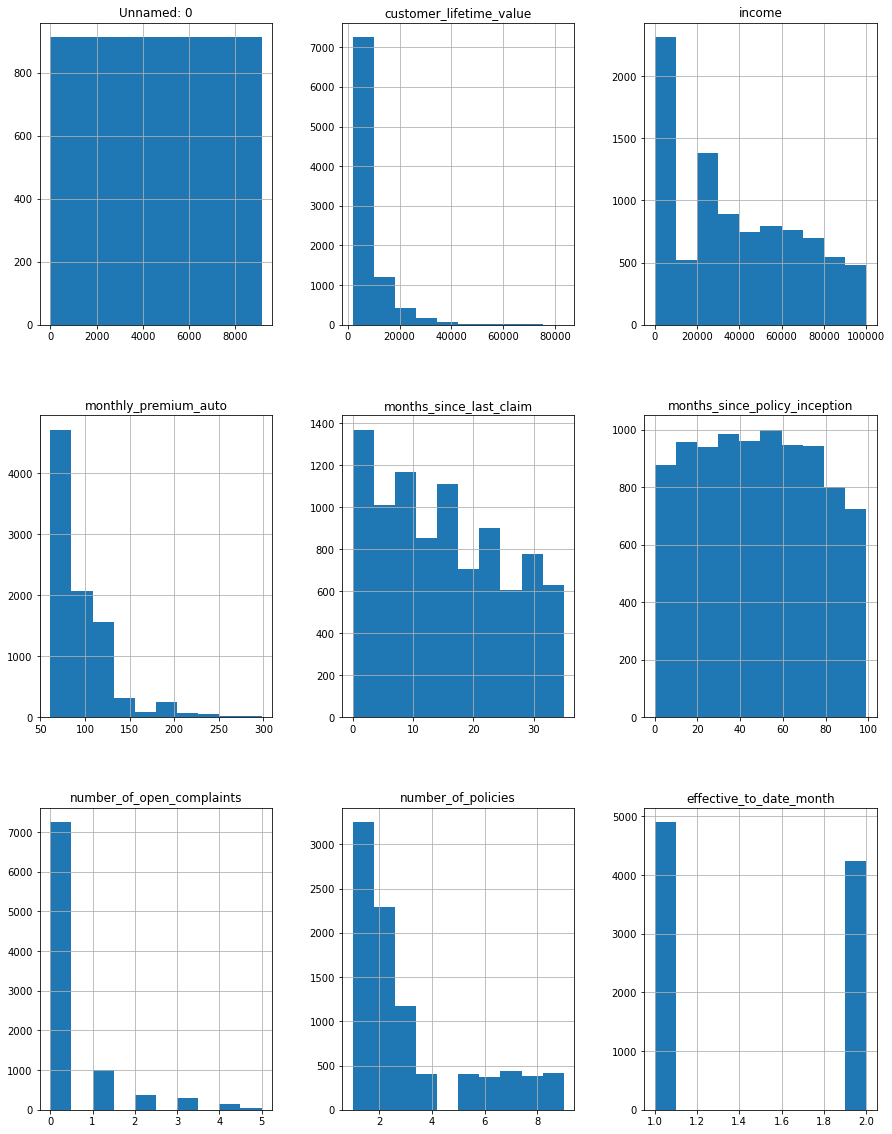

In [99]:
x_num.hist(figsize = (15,20));

<AxesSubplot:xlabel='customer_lifetime_value'>

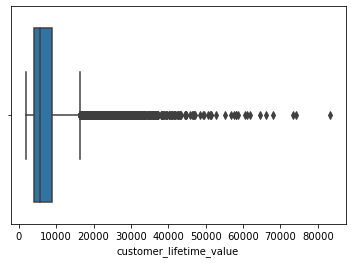

In [100]:
sns.boxplot(x=x_num['customer_lifetime_value'])

In [101]:
x_num=x_num.drop(['Unnamed: 0'],axis=1) #dropping Unnamed: 0 column because it doesn't add value

In [102]:
# removing outliers
iqr=np.percentile(x_num['customer_lifetime_value'],75)-np.percentile(x_num['customer_lifetime_value'],25)
upper_limit=np.percentile(x_num['customer_lifetime_value'],75)+(1.5*iqr)
lower_limit=np.percentile(x_num['customer_lifetime_value'],25)-(1.5*iqr)
excl_outliers=x_num[(x_num['customer_lifetime_value']>lower_limit)&(x_num['customer_lifetime_value']<upper_limit)]

<AxesSubplot:xlabel='customer_lifetime_value'>

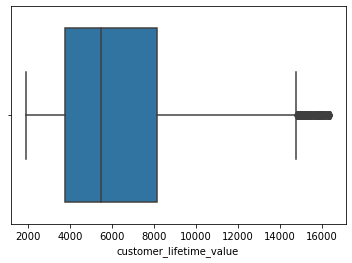

In [103]:
sns.boxplot(x=excl_outliers['customer_lifetime_value'])

<AxesSubplot:>

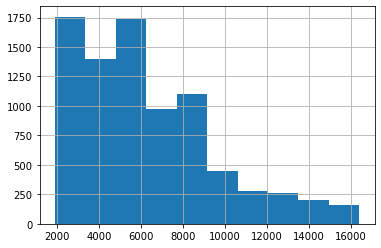

In [104]:
excl_outliers['customer_lifetime_value'].hist()

In [105]:
excl_outliers.shape

(8317, 8)

In [106]:
excl_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8317 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        8317 non-null   float64
 1   income                         8317 non-null   int64  
 2   monthly_premium_auto           8317 non-null   int64  
 3   months_since_last_claim        8317 non-null   int64  
 4   months_since_policy_inception  8317 non-null   int64  
 5   number_of_open_complaints      8317 non-null   int64  
 6   number_of_policies             8317 non-null   int64  
 7   effective_to_date_month        8317 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 584.8 KB


In [107]:
excl_outliers.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date_month
count,8317.000000,8317.000000,8317.000000,8317.000000,8317.000000,8317.000000,8317.000000,8317.000000
mean,6279.177892,37638.476855,90.949621,15.034387,48.063124,0.393171,3.037994,1.464350
std,3240.426385,30415.335684,31.047412,10.038850,27.920250,0.927140,2.470996,0.498757
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3746.751625,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,1.000000
50%,5470.060561,33837.000000,81.000000,14.000000,48.000000,0.000000,2.000000,1.000000
75%,8162.617053,62229.000000,107.000000,23.000000,71.000000,0.000000,4.000000,2.000000
max,16407.664610,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2.000000


**Re-scaling**

In [108]:
def log_transform_clean(x):
    x=np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

x_num['customer_lifetime_value_log']=list(map(log_transform_clean,x_num['customer_lifetime_value']))

<AxesSubplot:>

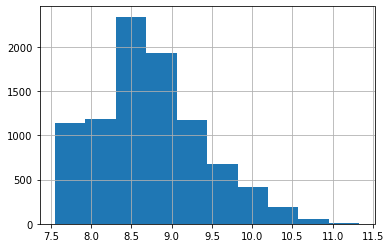

In [109]:
x_num['customer_lifetime_value_log'].hist()

In [110]:
x_num['customer_lifetime_value_log']=x_num['customer_lifetime_value_log'].fillna(np.mean(x_num['customer_lifetime_value_log']))

In [111]:
x_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   effective_to_date_month        9134 non-null   int64  
 8   customer_lifetime_value_log    9134 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 642.4 KB


In [112]:
x_num=x_num.drop(['customer_lifetime_value'], axis=1) # replacing the column

In [113]:
from sklearn.preprocessing import MinMaxScaler 

transform=MinMaxScaler().fit(x_num)
x_mmscaled=transform.transform(x_num)

In [114]:
x_mmscaled.shape

(9134, 8)

In [115]:
scaled=pd.DataFrame(x_mmscaled)

In [116]:
x_num.shape

(9134, 8)

**Pre-processing categorical data**

In [117]:
x_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [118]:
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer           9134 non-null   object
 1   state              9134 non-null   object
 2   response           9134 non-null   object
 3   coverage           9134 non-null   object
 4   education          9134 non-null   object
 5   effective_to_date  9134 non-null   object
 6   employmentstatus   9134 non-null   object
 7   gender             9134 non-null   object
 8   location_code      9134 non-null   object
 9   marital_status     9134 non-null   object
 10  policy_type        9134 non-null   object
 11  policy             9134 non-null   object
 12  renew_offer_type   9134 non-null   object
 13  sales_channel      9134 non-null   object
 14  vehicle_class      9134 non-null   object
 15  vehicle_size       9134 non-null   object
dtypes: object(16)
memory usage: 1.1+ MB


**Encoding categorical data fields using OHE**

In [119]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(x_cat)
encoded = encoder.transform(x_cat).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [120]:
x_cat=encoded

In [121]:
y.shape

(9134,)

In [122]:
x_cat.shape

(9134, 9234)

In [123]:
x_num.shape

(9134, 8)

**Concatenating**

In [124]:
x=np.concatenate((x_num,x_cat),axis=1)

In [125]:
x.shape

(9134, 9242)

In [126]:
y.shape

(9134,)

**Clarifying the variables for the objective**

In [127]:
y=data_num['total_claim_amount']

In [128]:
x=data_num.drop(['total_claim_amount'],axis=1)

**Splitting into train set and test dataset**

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

**05.Modeling**

**Applying the model**

In [131]:
lm=linear_model.LinearRegression()
model=lm.fit(x_train,y_train)  
predictions=lm.predict(x_test) 
r2_score(y_test, predictions)

0.5209470514210601

In [132]:
predictions

array([186.62972924, 462.50958194, 699.71205046, ..., 127.47719849,
       469.98815588, 253.10704513])

In [133]:
x_test.shape

(1827, 9)

In [134]:
y_test.shape

(1827,)

**06.Model Validation**

In [135]:
r2_score(y_test, predictions)

0.5209470514210601

In [137]:
mse=mean_squared_error(y_test, predictions)
mse

39829.61273193308

In [138]:
rmse=np.sqrt(mse)
rmse

199.57357723890473

_(I don't know which validation is better for this case study. Looking at the output for r2_score, it seems like there is not a high accuracy)_